## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
soccer_df = pd.read_csv('/Users/ryanferns/Documents/Data_Science/lighthouse_labs_training/DS_auticon_week_3/results.csv')

In [4]:
soccer_df.head()


date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [5]:
soccer_df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [6]:
soccer_df.describe()

home_score    away_score
count  41586.000000  41586.000000
mean       1.745756      1.187587
std        1.753780      1.405323
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000

In [7]:
len(soccer_df)

41586

In [8]:
soccer_df["tournament"].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [9]:
fifa_df = soccer_df[(soccer_df["tournament"] == 'FIFA World Cup')]
fifa_df.head()

date  home_team      away_team  home_score  away_score  \
1304  1930-07-13    Belgium  United States           0           3   
1305  1930-07-13     France         Mexico           4           1   
1306  1930-07-14     Brazil     Yugoslavia           1           2   
1307  1930-07-14       Peru        Romania           1           3   
1308  1930-07-15  Argentina         France           1           0   

          tournament        city  country  neutral  
1304  FIFA World Cup  Montevideo  Uruguay     True  
1305  FIFA World Cup  Montevideo  Uruguay     True  
1306  FIFA World Cup  Montevideo  Uruguay     True  
1307  FIFA World Cup  Montevideo  Uruguay     True  
1308  FIFA World Cup  Montevideo  Uruguay     True

In [10]:
len(fifa_df)

900

In [11]:
fifa_df["home_team"].unique()

array(['Belgium', 'France', 'Brazil', 'Peru', 'Argentina', 'Chile',
       'Bolivia', 'Paraguay', 'Uruguay', 'Austria', 'Czechoslovakia',
       'Egypt', 'Italy', 'Netherlands', 'Germany', 'Cuba', 'Hungary',
       'Spain', 'Switzerland', 'Mexico', 'England', 'Sweden', 'Scotland',
       'South Korea', 'Colombia', 'Russia', 'Bulgaria', 'North Korea',
       'Portugal', 'Israel', 'Morocco', 'El Salvador', 'DR Congo',
       'German DR', 'Poland', 'Yugoslavia', 'Haiti', 'Australia', 'Iran',
       'Algeria', 'Honduras', 'Canada', 'Northern Ireland', 'Denmark',
       'Iraq', 'United Arab Emirates', 'United States', 'Costa Rica',
       'Cameroon', 'Republic of Ireland', 'Norway', 'Nigeria', 'Romania',
       'Saudi Arabia', 'Greece', 'Jamaica', 'Serbia', 'South Africa',
       'Japan', 'Croatia', 'China PR', 'Tunisia', 'Senegal', 'Slovenia',
       'Ecuador', 'Turkey', 'Trinidad and Tobago', 'Angola',
       'Czech Republic', 'Togo', 'Ivory Coast', 'Ghana', 'Ukraine',
       'New Zealand

In [12]:
fifa_df["away_team"].unique()

array(['United States', 'Mexico', 'Yugoslavia', 'Romania', 'France',
       'Peru', 'Paraguay', 'Brazil', 'Chile', 'Argentina', 'Sweden',
       'Germany', 'Spain', 'Hungary', 'Switzerland', 'Austria',
       'Czechoslovakia', 'Poland', 'Netherlands', 'Belgium', 'Indonesia',
       'Norway', 'Italy', 'England', 'Uruguay', 'Scotland', 'Turkey',
       'South Korea', 'Northern Ireland', 'Russia', 'Wales', 'Bulgaria',
       'Portugal', 'North Korea', 'El Salvador', 'Morocco', 'Australia',
       'Haiti', 'German DR', 'DR Congo', 'Tunisia', 'Cameroon',
       'New Zealand', 'Algeria', 'Honduras', 'Kuwait', 'Iraq', 'Denmark',
       'Canada', 'Colombia', 'Republic of Ireland', 'Egypt',
       'United Arab Emirates', 'Costa Rica', 'Bolivia', 'Saudi Arabia',
       'Greece', 'Nigeria', 'South Africa', 'Japan', 'Croatia', 'Iran',
       'Jamaica', 'Serbia', 'Senegal', 'Slovenia', 'Ecuador', 'China PR',
       'Ivory Coast', 'Ghana', 'Czech Republic', 'Togo', 'Ukraine',
       'Trinidad and To

In [13]:
df_home = fifa_df[["home_team", "home_score"]]
df_home.rename(columns = {"home_team" : "team"}, inplace = True)
df_1 = df_home.groupby("team").sum()
df_1

/Users/ryanferns/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


home_score
team                            
Algeria                        5
Angola                         0
Argentina                    114
Australia                      7
Austria                       30
...                          ...
Ukraine                        1
United Arab Emirates           0
United States                 12
Uruguay                       31
Yugoslavia                    14

[78 rows x 1 columns]

In [14]:
df_away = fifa_df[["away_team", "away_score"]]
df_away.rename(columns = {"away_team" : "team"}, inplace = True)
df_2 = df_away.groupby("team").sum()
df_2

/Users/ryanferns/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


away_score
team                            
Algeria                        8
Angola                         1
Argentina                     23
Australia                      6
Austria                       13
...                          ...
United Arab Emirates           2
United States                 25
Uruguay                       56
Wales                          4
Yugoslavia                    41

[79 rows x 1 columns]

In [15]:
df = pd.merge(df_1, df_2, on="team", how="outer")

In [16]:
df.fillna(0, inplace=True)
df["total_goals"] = df["home_score"] + df["away_score"]
df.sort_values(by ="total_goals", ascending=False, inplace=True)
df

home_score  away_score  total_goals
team                                                    
Brazil                    177.0        52.0        229.0
Germany                   158.0        68.0        226.0
Argentina                 114.0        23.0        137.0
Italy                      72.0        56.0        128.0
France                     85.0        35.0        120.0
...                         ...         ...          ...
DR Congo                    0.0         0.0          0.0
China PR                    0.0         0.0          0.0
Canada                      0.0         0.0          0.0
Indonesia                   0.0         0.0          0.0
Trinidad and Tobago         0.0         0.0          0.0

[81 rows x 3 columns]

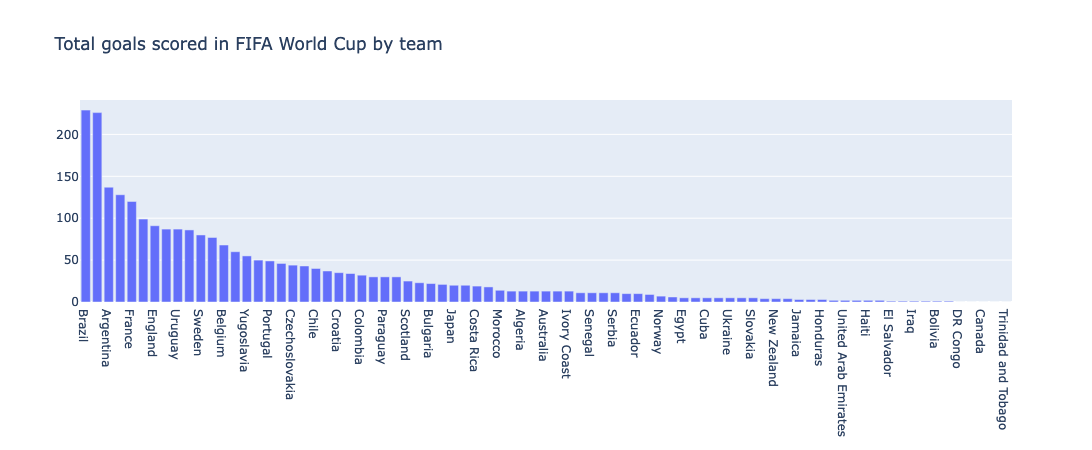

In [17]:
data = [go.Bar(
    x= df.index,  
    y= df["total_goals"]
)]

# create the layout
layout = go.Layout(
    title="Total goals scored in FIFA World Cup by team "
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

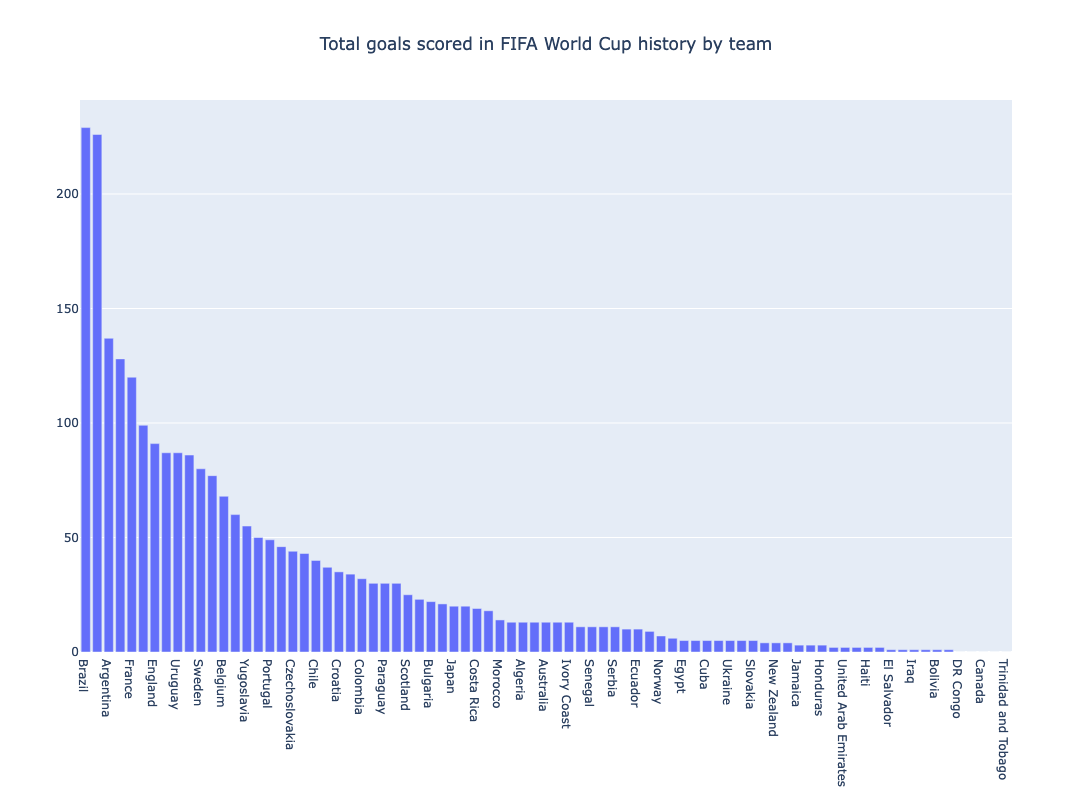

In [18]:
data = [go.Bar(
    x= df.index,  
    y= df["total_goals"]
)]

# create the layout
layout = go.Layout(
    title = {
        'text': "Total goals scored in FIFA World Cup history by team",
        'x': 0.5},
    autosize = False,
    width = 1175,
    height = 800,
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

In [19]:
df_top5 = df.head()
df_top5

home_score  away_score  total_goals
team                                          
Brazil          177.0        52.0        229.0
Germany         158.0        68.0        226.0
Argentina       114.0        23.0        137.0
Italy            72.0        56.0        128.0
France           85.0        35.0        120.0

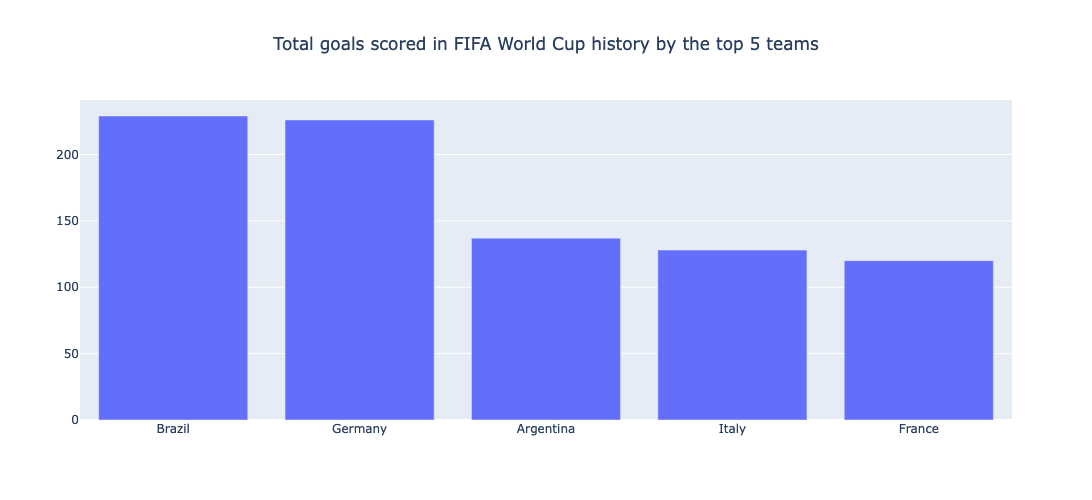

In [20]:
data = [go.Bar(
    x= df_top5.index,  
    y= df_top5["total_goals"]
)]

# create the layout
layout = go.Layout(
    title = {
        'text': "Total goals scored in FIFA World Cup history by the top 5 teams",
        'x': 0.5},
    autosize = False,
    width = 600,
    height = 500,
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

In [21]:
# Brazil is the team that scored the most goals.

## Task
What is the number of matches played in each tournament throughout history?

In [22]:
df_3 = soccer_df["tournament"].value_counts()
df_3

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
World Unity Cup                             4
OSN Cup                                     4
Atlantic Heritage Cup                       2
Copa América qualification                  2
AFF Championship qualification              2
Name: tournament, Length: 112, dtype: int64

In [23]:
len(df_3)

112

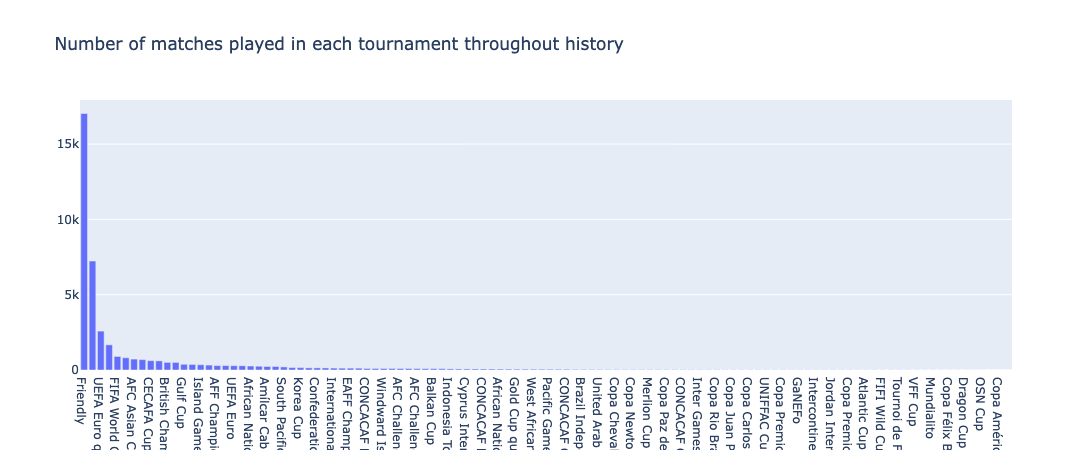

In [24]:
# create the data
data = [go.Bar(
    x=df_3.index,
    y=df_3.array,
)]

# create the layout
layout = go.Layout(
    title='Number of matches played in each tournament throughout history'
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

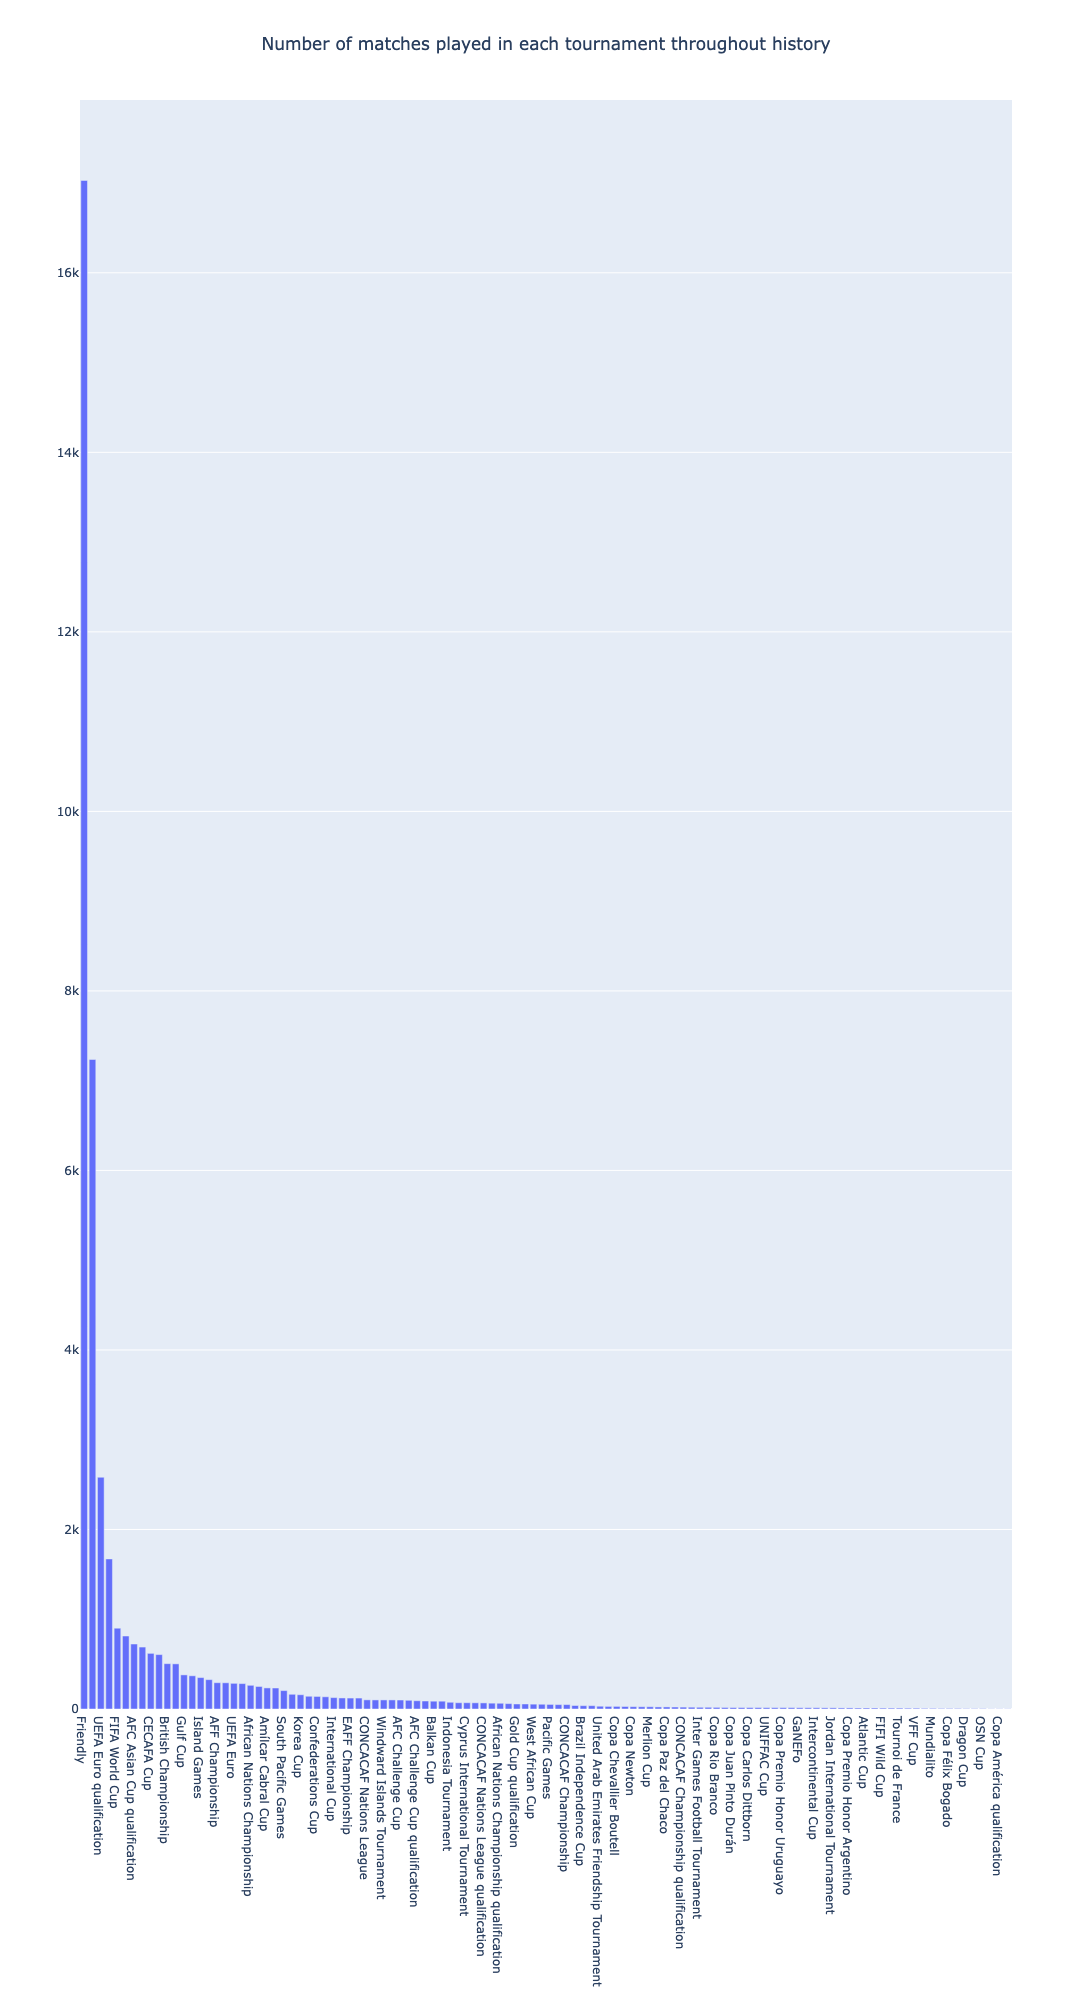

In [25]:
# create the data
data = [go.Bar(
    x=df_3.index,
    y=df_3.array,
)]

# create the layout
layout = go.Layout(
    title = {
        'text': 'Number of matches played in each tournament throughout history',
        'x': 0.5},
    autosize = False,
    width = 1000,
    height = 2000)
    

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

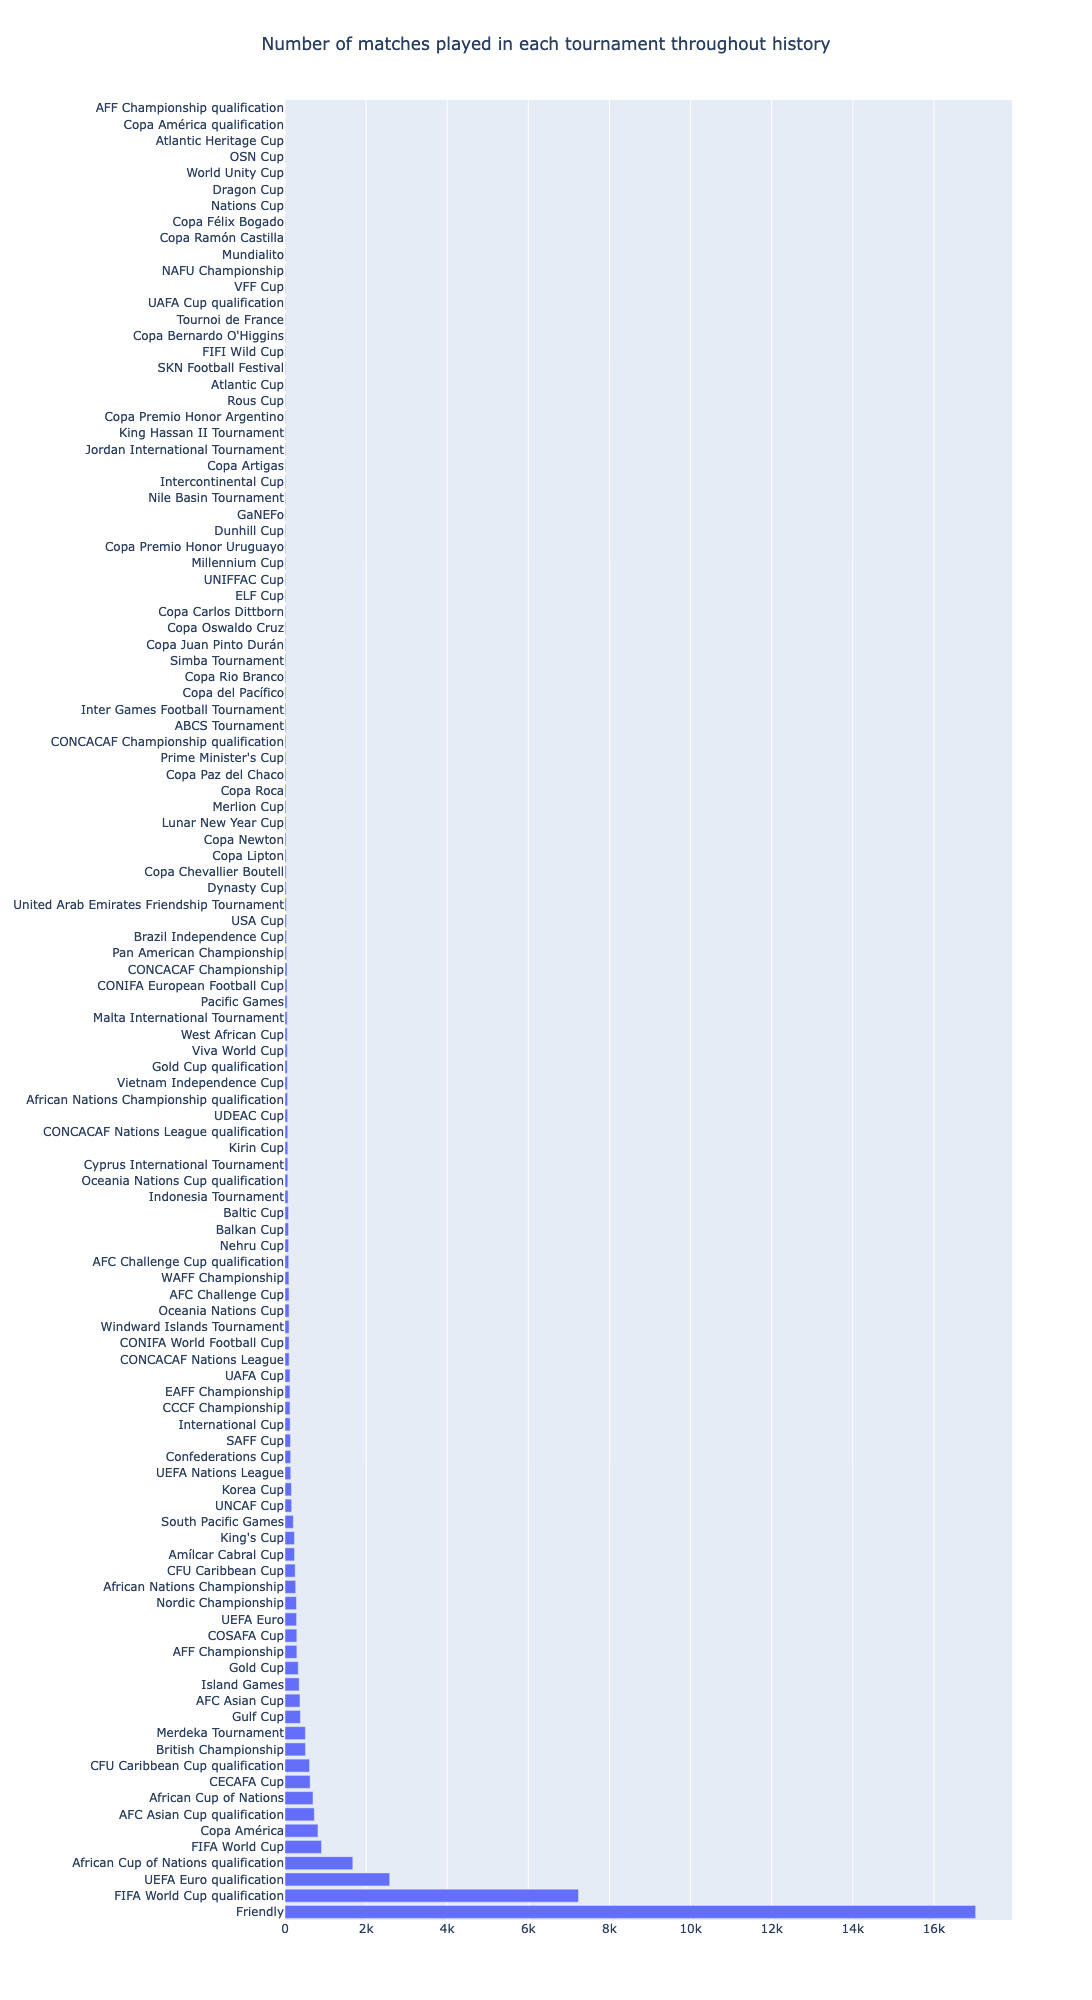

In [26]:
# create the data
data = [go.Bar(
    x=df_3.array,
    y=df_3.index,
    orientation='h'
)]

# create the layout
layout = go.Layout(
    title = {
        'text': 'Number of matches played in each tournament throughout history',
        'x': 0.5},
    autosize = False,
    width = 20000,
    height = 2000)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

On November 26, 2020, I spoke to the mentor Arshad Ahmed and he made the following suggestions.

Suggestions for visualisation 
- Plotting as a horizontal bar example of this can be seen here 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html 
    - Plotting log of the counts e.g. Log of value counts vs. tournaments 
    
    x axis = tournaments y axis = log of value counts

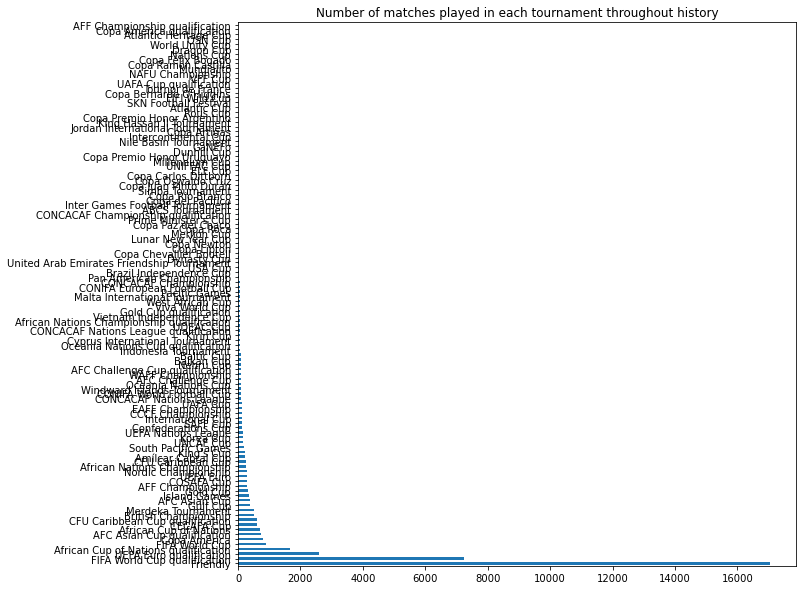

In [27]:
df_3.plot.barh(figsize = (10, 10), title = 'Number of matches played in each tournament throughout history')

In [28]:
df_3.rename("Number of matches", inplace=True)
df_3.head()


Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
Name: Number of matches, dtype: int64

In [29]:
df_4 = df_3.to_frame()
df_4.head()

Number of matches
Friendly                                          17029
FIFA World Cup qualification                       7236
UEFA Euro qualification                            2582
African Cup of Nations qualification               1672
FIFA World Cup                                      900

In [30]:
df_4["Number of matches_log"] = df_4["Number of matches"].apply(np.log)
df_4.head()

Number of matches  Number of matches_log
Friendly                                          17029               9.742673
FIFA World Cup qualification                       7236               8.886824
UEFA Euro qualification                            2582               7.856320
African Cup of Nations qualification               1672               7.421776
FIFA World Cup                                      900               6.802395

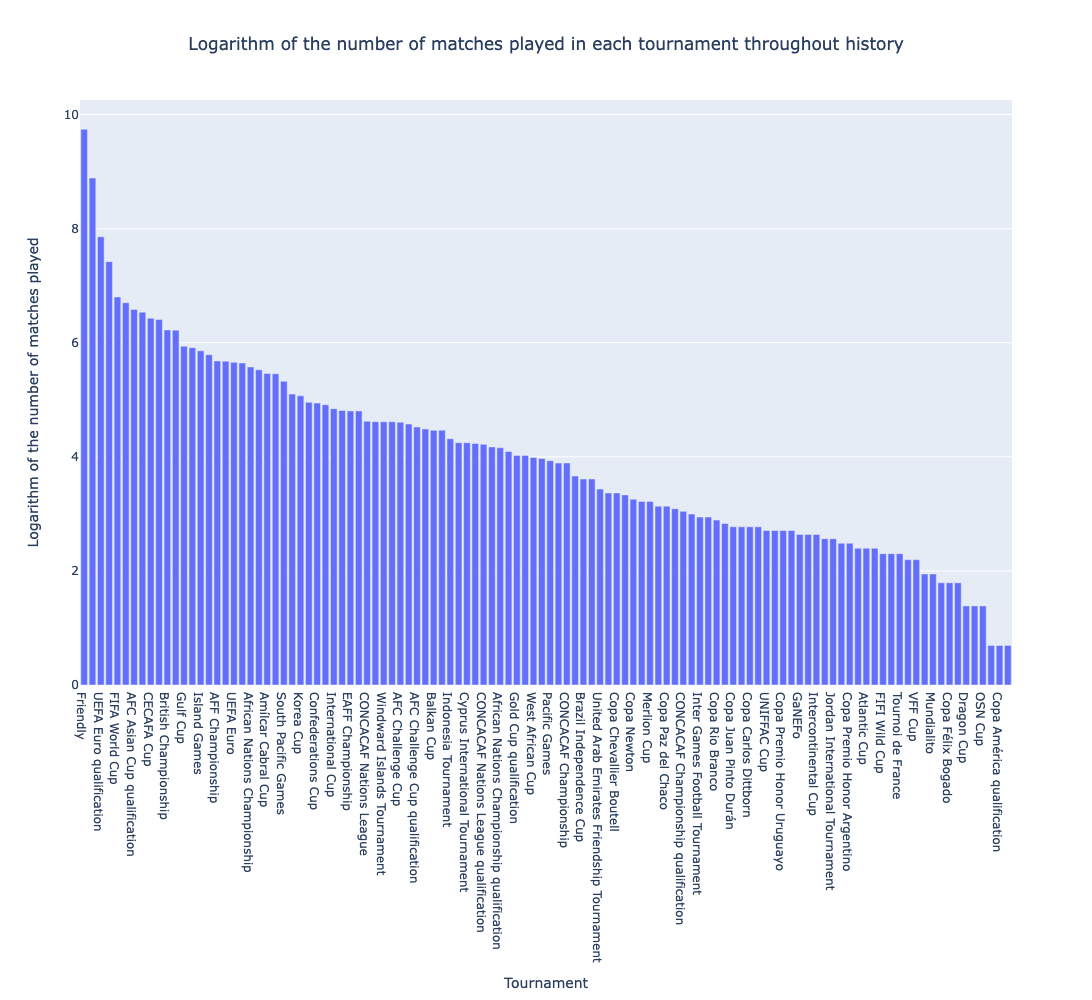

In [31]:
# create the data
data = [go.Bar(
    x=df_4.index,
    y=df_4["Number of matches_log"],
)]

# create the layout
layout = go.Layout(
    title = {
        'text': 'Logarithm of the number of matches played in each tournament throughout history',
        'x': 0.5},
    xaxis = dict(title = 'Tournament'), # x-axis label
    yaxis = dict(title = 'Logarithm of the number of matches played'), # y-axis label
    autosize = False,
    width = 1000,
    height = 1000)


# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

I prefer the above bar chart the best.  Note that since logarithm is an increasing function, the tournaments would still be arranged in the same order if logarithm were not applied to the number of matches but the shape of the bar chart and the y-axis values would be different.

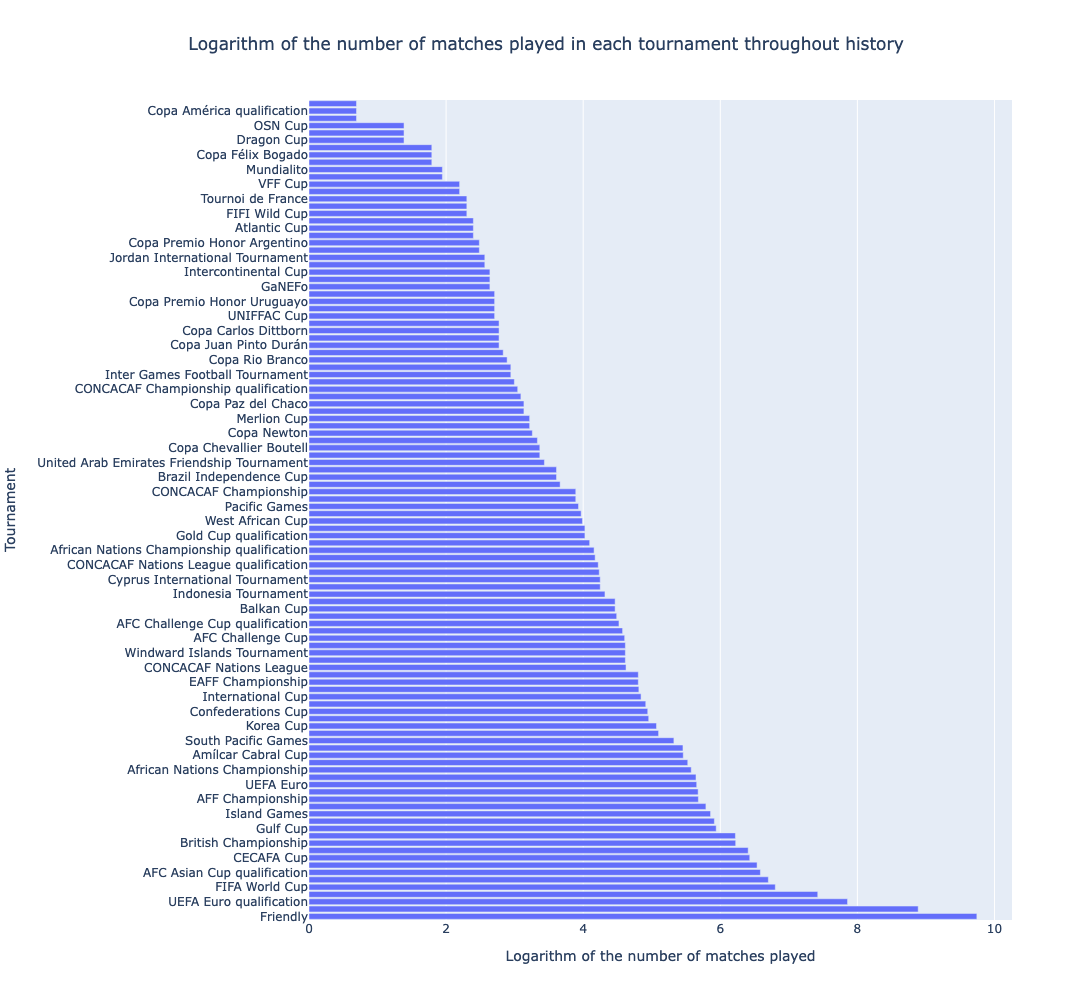

In [32]:
# create the data
data = [go.Bar(
    x=df_4["Number of matches_log"],
    y=df_4.index,
    orientation='h'
)]

# create the layout
layout = go.Layout(
    title = {
        'text': 'Logarithm of the number of matches played in each tournament throughout history',
        'x': 0.5},
    xaxis = dict(title = 'Logarithm of the number of matches played'), # x-axis label
    yaxis = dict(title = 'Tournament'), # y-axis label
    autosize = False,
    width = 1000,
    height = 1000)


# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

## Task 
Show the trend in number of matches per year.

In [33]:
soccer_df["date"].dtype

dtype('O')

In [34]:
pd.to_datetime(soccer_df["date"]).dt.year

0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
41581    2020
41582    2020
41583    2020
41584    2020
41585    2020
Name: date, Length: 41586, dtype: int64

In [35]:
df_5 = soccer_df.copy()

In [36]:
df_5["year"] = pd.to_datetime(soccer_df["date"]).dt.year
df_5

date      home_team   away_team  home_score  away_score  \
0      1872-11-30       Scotland     England           0           0   
1      1873-03-08        England    Scotland           4           2   
2      1874-03-07       Scotland     England           2           1   
3      1875-03-06        England    Scotland           2           2   
4      1876-03-04       Scotland     England           3           0   
...           ...            ...         ...         ...         ...   
41581  2020-01-10       Barbados      Canada           1           4   
41582  2020-01-12         Kosovo      Sweden           0           1   
41583  2020-01-15         Canada     Iceland           0           1   
41584  2020-01-19    El Salvador     Iceland           0           1   
41585  2020-02-01  United States  Costa Rica           1           0   

      tournament     city        country  neutral  year  
0       Friendly  Glasgow       Scotland    False  1872  
1       Friendly   London        England    False  1873  
2       Friendly  Glasgow       Scotland    False  1874  
3       Friendly   London        England    False  1875  
4       Friendly  Glasgow       Scotland    False  1876  
...          ...      ...            ...      ...   ...  
41581   Friendly   Irvine  United States     True  2020  
41582   Friendly     Doha          Qatar     True  2020  
41583   Friendly   Irvine  United States     True  2020  
41584   Friendly   Carson  United States     True  2020  
41585   Friendly   Carson  United States    False  2020  

[41586 rows x 10 columns]

In [37]:
df_5["year"].value_counts()

2019    1155
2008    1091
2011    1081
2004    1064
2000    1026
        ... 
1877       2
1875       1
1874       1
1872       1
1873       1
Name: year, Length: 149, dtype: int64

In [38]:
df_trend = df_5["year"].value_counts().sort_index()
df_trend

1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2016     926
2017     958
2018     905
2019    1155
2020       7
Name: year, Length: 149, dtype: int64

In [39]:
years = df_trend.index
yearly_matches = df_trend.array
years, yearly_matches 

(Int64Index([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
             ...
             2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
            dtype='int64', length=149),
 <PandasArray>
 [   1,    1,    1,    1,    2,    2,    2,    3,    3,    3,
  ...
  1081, 1012,  965,  860, 1003,  926,  958,  905, 1155,    7]
 Length: 149, dtype: int64)

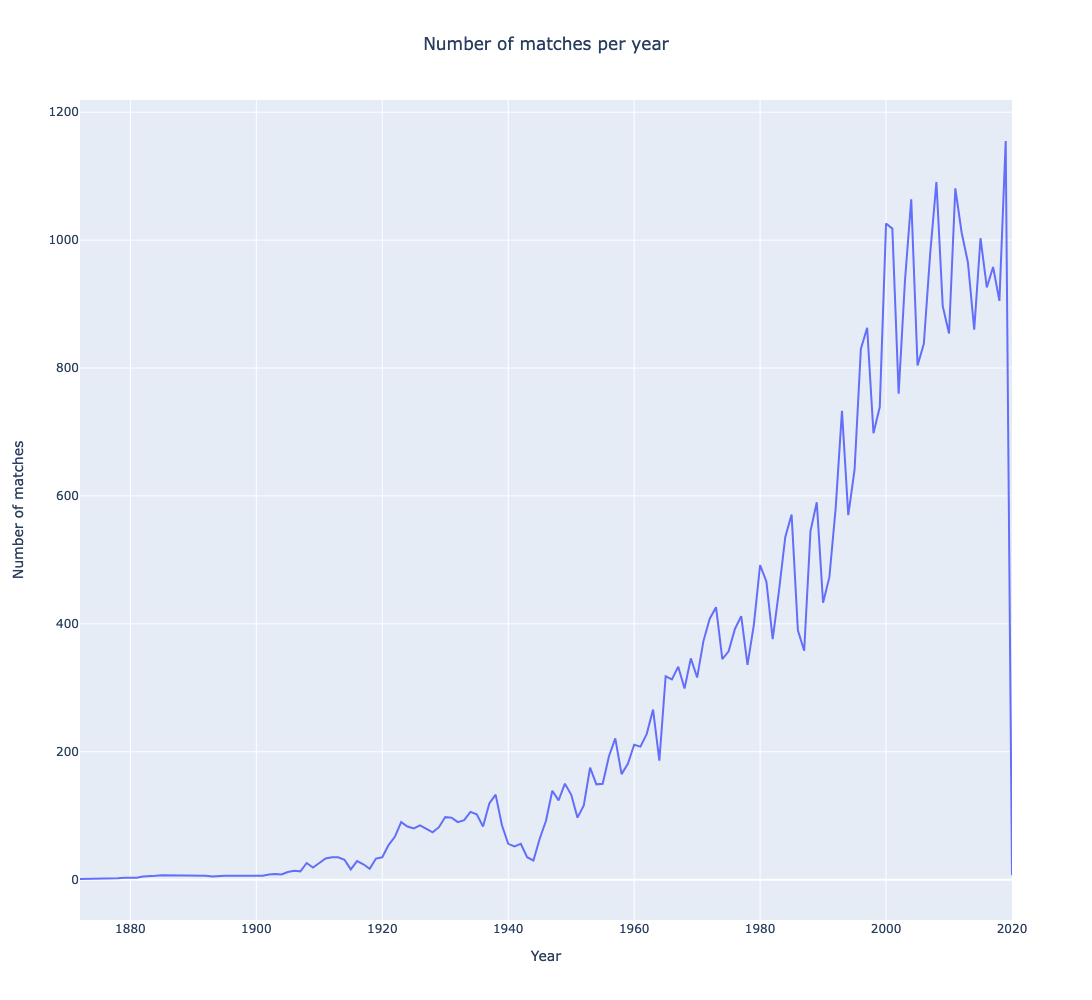

In [40]:
data = [go.Scatter(
    x = years,
    y = yearly_matches
    )]

layout = go.Layout(
    title = {
        'text': 'Number of matches per year', # Graph title
        'x': 0.5},
    xaxis = dict(title = 'Year'), # x-axis label
    yaxis = dict(title = 'Number of matches'), # y-axis label
    autosize = False,
    width = 1000,
    height = 1000)


fig = go.Figure(data=data,layout=layout)
fig.show()

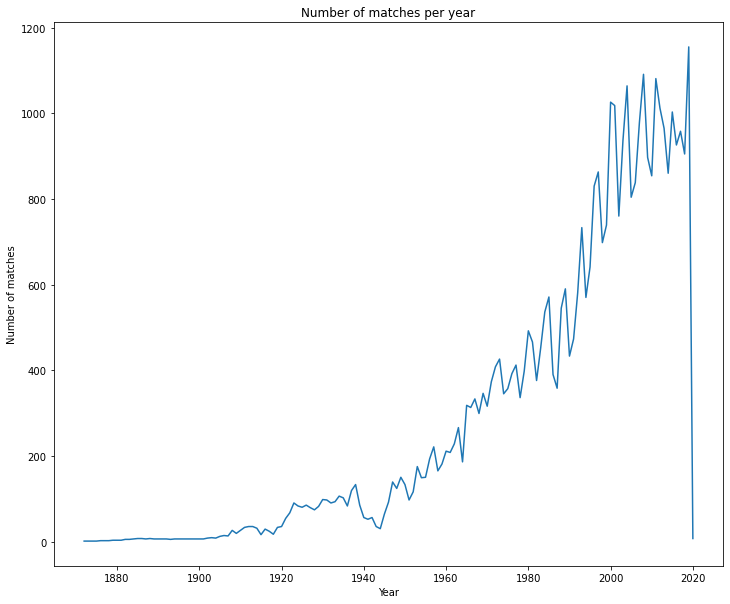

In [41]:
plt.figure(figsize=(12, 10))
x = years.to_numpy(dtype = int)
y = yearly_matches.to_numpy(dtype = int)
x, y
plt.plot(x, y)
plt.title('Number of matches per year')

# x-axis title
plt.xlabel('Year')

# y-axis title
plt.ylabel('Number of matches')
plt.show()

## Task
Which teams are the most successful ones? (winning percentage)

To calcuate the winning percentage for a team, it is the (number of wins + half the number of ties) divided by the total games played.

In [42]:
df_6 = soccer_df.iloc[:, 0:5]
df_6

date      home_team   away_team  home_score  away_score
0      1872-11-30       Scotland     England           0           0
1      1873-03-08        England    Scotland           4           2
2      1874-03-07       Scotland     England           2           1
3      1875-03-06        England    Scotland           2           2
4      1876-03-04       Scotland     England           3           0
...           ...            ...         ...         ...         ...
41581  2020-01-10       Barbados      Canada           1           4
41582  2020-01-12         Kosovo      Sweden           0           1
41583  2020-01-15         Canada     Iceland           0           1
41584  2020-01-19    El Salvador     Iceland           0           1
41585  2020-02-01  United States  Costa Rica           1           0

[41586 rows x 5 columns]

In [43]:
df_6["home_win"] = (df_6["home_score"] > df_6["away_score"]).astype(int)
df_6["home_loss"] = (df_6["home_score"] < df_6["away_score"]).astype(int)
df_6["home_tie"] = (df_6["home_score"] == df_6["away_score"]).astype(int)
#df_6["away_wins"] = df_6["home_losses"] 
#df_6["away_losses"] = df_6["home_wins"]

df_6.head()

# Note that for the away_team, home_loss is a win, home_win is a loss, and home_tie is a tie.

date home_team away_team  home_score  away_score  home_win  \
0  1872-11-30  Scotland   England           0           0         0   
1  1873-03-08   England  Scotland           4           2         1   
2  1874-03-07  Scotland   England           2           1         1   
3  1875-03-06   England  Scotland           2           2         0   
4  1876-03-04  Scotland   England           3           0         1   

   home_loss  home_tie  
0          0         1  
1          0         0  
2          0         0  
3          0         1  
4          0         0

In [44]:
df_home2 = df_6[["home_team", "home_win", "home_loss", "home_tie"]]
df_home2.head()

home_team  home_win  home_loss  home_tie
0  Scotland         0          0         1
1   England         1          0         0
2  Scotland         1          0         0
3   England         0          0         1
4  Scotland         1          0         0

In [45]:
df_home2.rename(columns = {"home_team": "team", "home_win": "win", "home_loss": "loss", "home_tie": "tie"}, inplace=True)
df_home2.head()

/Users/ryanferns/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



team  win  loss  tie
0  Scotland    0     0    1
1   England    1     0    0
2  Scotland    1     0    0
3   England    0     0    1
4  Scotland    1     0    0

In [46]:
df_away2 = df_6[["away_team", "home_loss", "home_win", "home_tie"]]
df_away2.head()

away_team  home_loss  home_win  home_tie
0   England          0         0         1
1  Scotland          0         1         0
2   England          0         1         0
3  Scotland          0         0         1
4   England          0         1         0

In [47]:
df_away2.rename(columns = {"away_team": "team", "home_loss": "win", "home_win": "loss", "home_tie": "tie"}, inplace=True)
df_away2.head()

/Users/ryanferns/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



team  win  loss  tie
0   England    0     0    1
1  Scotland    0     1    0
2   England    0     1    0
3  Scotland    0     0    1
4   England    0     1    0

In [48]:
df_7 = pd.concat([df_home2, df_away2])
df_7.head()

team  win  loss  tie
0  Scotland    0     0    1
1   England    1     0    0
2  Scotland    1     0    0
3   England    0     0    1
4  Scotland    1     0    0

In [49]:
len(df_7)

83172

In [50]:
df_wp = df_7.groupby('team').sum()
df_wp.head()

win  loss  tie
team                       
Abkhazia      12     4   12
Afghanistan   30    57   24
Albania       84   179   69
Alderney       3    16    0
Algeria      214   152  139

In [51]:
len(df_wp)

312

In [52]:
df_wp["total games"] = (df_wp["win"] + df_wp["loss"]+ df_wp["tie"])
df_wp["winning percentage"] = (100 * (df_wp["win"] + 0.5 * df_wp["tie"]) 
                               / df_wp["total games"])
      

In [53]:
df_wp.head()

win  loss  tie  total games  winning percentage
team                                                        
Abkhazia      12     4   12           28           64.285714
Afghanistan   30    57   24          111           37.837838
Albania       84   179   69          332           35.692771
Alderney       3    16    0           19           15.789474
Algeria      214   152  139          505           56.138614

In [54]:
df_wp2 = df_wp.sort_values(by="winning percentage", ascending=False)
df_wp2.head(20)

win  loss  tie  total games  winning percentage
team                                                               
Surrey                1     0    0            1          100.000000
Asturias              1     0    0            1          100.000000
Yorkshire             5     1    1            7           78.571429
Andalusia             8     1    4           13           76.923077
Padania              29     6    8           43           76.744186
Canary Islands        3     1    0            4           75.000000
Basque Country       37     9   11           57           74.561404
Brazil              625   157  199          981           73.853211
Jersey               55    16   11           82           73.780488
County of Nice        6     2    1            9           72.222222
Kárpátalja            5     1    4           10           70.000000
Spain               406   130  158          694           69.884726
Northern Cyprus      20     7    7           34           69.117647
Germany             555   200  194          949           68.703899
England             572   195  242         1009           68.681863
Iran                272    99  128          499           67.334669
Italy               423   153  224          800           66.875000
Croatia             170    63   85          318           66.823899
Corsica               4     1    4            9           66.666667
Parishes of Jersey    2     1    0            3           66.666667

It does not make sense to say that a team that has played and won only 1 game is the most successful even thought it has a winning percentage of 100 %.  We will limit the set of teams to those that have played at least a certain amount of games.

In [55]:
df_wp2.describe()

win        loss         tie  total games  winning percentage
count  312.000000  312.000000  312.000000   312.000000          312.000000
mean   102.589744  102.589744   61.397436   266.576923           43.215958
std    122.270922   87.205370   63.965845   258.502030           17.451806
min      0.000000    0.000000    0.000000     1.000000            0.000000
25%      8.000000   16.750000    4.000000    34.000000           33.152174
50%     50.000000   92.000000   38.000000   200.000000           45.514883
75%    155.500000  160.250000  108.500000   449.250000           55.621026
max    625.000000  400.000000  243.000000  1018.000000          100.000000

In [56]:
df_wp2["total games"].quantile(np.linspace(0, 1, 11))

0.0       1.0
0.1       9.0
0.2      21.4
0.3      49.6
0.4     116.4
0.5     200.0
0.6     251.8
0.7     384.5
0.8     516.6
0.9     643.5
1.0    1018.0
Name: total games, dtype: float64

In [57]:
df_wp2[(df_wp2["total games"] > 100)].head(10)

win  loss  tie  total games  winning percentage
team                                                        
Brazil       625   157  199          981           73.853211
Spain        406   130  158          694           69.884726
Germany      555   200  194          949           68.703899
England      572   195  242         1009           68.681863
Iran         272    99  128          499           67.334669
Italy        423   153  224          800           66.875000
Croatia      170    63   85          318           66.823899
Argentina    526   211  243          980           66.071429
South Korea  454   186  222          862           65.545244
Russia       356   156  182          694           64.409222

In [58]:
df_wp3 = df_wp2[(df_wp2["total games"] > 100)].head(10)
df_wp3

win  loss  tie  total games  winning percentage
team                                                        
Brazil       625   157  199          981           73.853211
Spain        406   130  158          694           69.884726
Germany      555   200  194          949           68.703899
England      572   195  242         1009           68.681863
Iran         272    99  128          499           67.334669
Italy        423   153  224          800           66.875000
Croatia      170    63   85          318           66.823899
Argentina    526   211  243          980           66.071429
South Korea  454   186  222          862           65.545244
Russia       356   156  182          694           64.409222

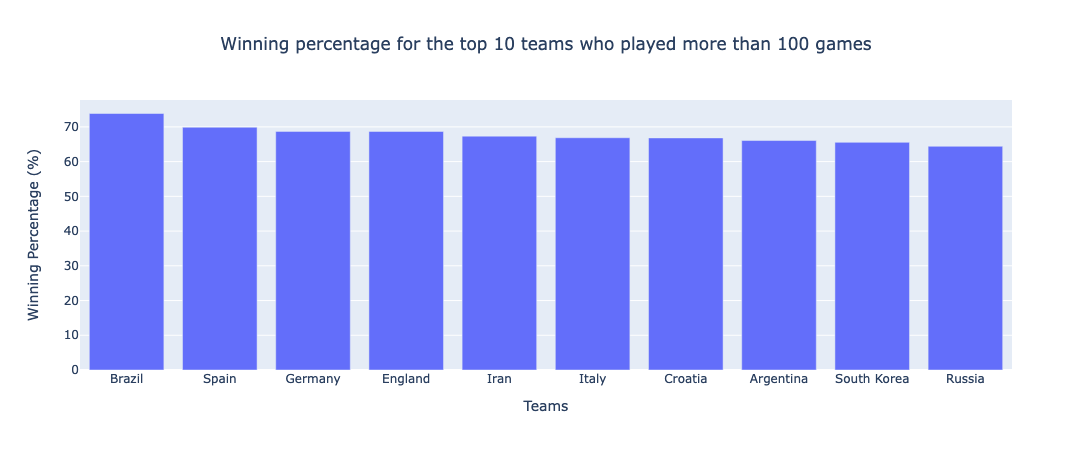

In [59]:
data = [go.Bar(
    x= df_wp3.index,  
    y= df_wp3["winning percentage"]
)]

# create the layout
layout = go.Layout(
    title = {
        'text': 'Winning percentage for the top 10 teams who played more than 100 games',
        'x': 0.5},
    xaxis = dict(title = 'Teams'), # x-axis label
    yaxis = dict(title = 'Winning Percentage (%)', # y-axis label
                 tickmode = 'linear',
                 tick0 = 0,
                 dtick = 10
                )
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

## Task
Which teams played against each other the most?

In [60]:
df_teams1 = soccer_df.iloc[:, 1:3]
df_teams1.head()

home_team away_team
0  Scotland   England
1   England  Scotland
2  Scotland   England
3   England  Scotland
4  Scotland   England

In [61]:
df_teams1.rename(columns = {"home_team": "team 1", "away_team": "team 2"}, inplace=True)
df_teams1.head()

team 1    team 2
0  Scotland   England
1   England  Scotland
2  Scotland   England
3   England  Scotland
4  Scotland   England

In [62]:
df_teams2 = soccer_df.iloc[:, 2:0:-1]
df_teams2.head()

away_team home_team
0   England  Scotland
1  Scotland   England
2   England  Scotland
3  Scotland   England
4   England  Scotland

In [63]:
df_teams2.rename(columns = {"away_team": "team 1", "home_team": "team 2"}, inplace=True)
df_teams2.head()

team 1    team 2
0   England  Scotland
1  Scotland   England
2   England  Scotland
3  Scotland   England
4   England  Scotland

In [64]:
df_teams = pd.concat([df_teams1, df_teams2])
len(df_teams)

83172

In [65]:
df_teams.groupby(["team 1", "team 2"]).size().sort_values(ascending=False)

team 1     team 2       
Uruguay    Argentina        176
Argentina  Uruguay          176
Austria    Hungary          133
Hungary    Austria          133
Belgium    Netherlands      125
                           ... 
Ethiopia   Angola             1
Qatar      Philippines        1
           Peru               1
           Pakistan           1
Laos       North Vietnam      1
Length: 13616, dtype: int64

In [66]:
df_teams3 = df_teams.groupby(["team 1", "team 2"]).size().sort_values(ascending=False)
df_teams3.head(20)

team 1       team 2     
Uruguay      Argentina      176
Argentina    Uruguay        176
Austria      Hungary        133
Hungary      Austria        133
Belgium      Netherlands    125
Netherlands  Belgium        125
Scotland     England        116
England      Scotland       116
Norway       Sweden         107
Uganda       Kenya          107
Sweden       Norway         107
Kenya        Uganda         107
Sweden       Denmark        106
Wales        Scotland       106
Scotland     Wales          106
Denmark      Sweden         106
Argentina    Brazil         104
Brazil       Argentina      104
Wales        England        103
England      Wales          103
dtype: int64

I want to try to use a heat map.

In [67]:
df_teams3.index

MultiIndex([(    'Uruguay',     'Argentina'),
            (  'Argentina',       'Uruguay'),
            (    'Austria',       'Hungary'),
            (    'Hungary',       'Austria'),
            (    'Belgium',   'Netherlands'),
            ('Netherlands',       'Belgium'),
            (   'Scotland',       'England'),
            (    'England',      'Scotland'),
            (     'Norway',        'Sweden'),
            (     'Uganda',         'Kenya'),
            ...
            (   'Eswatini',       'Senegal'),
            (   'Eswatini',  'Sierra Leone'),
            (      'Qatar',        'Norway'),
            (      'Qatar',        'Serbia'),
            (      'Qatar',      'Scotland'),
            (   'Ethiopia',        'Angola'),
            (      'Qatar',   'Philippines'),
            (      'Qatar',          'Peru'),
            (      'Qatar',      'Pakistan'),
            (       'Laos', 'North Vietnam')],
           names=['team 1', 'team 2'], length=13616)

In [68]:
type(df_teams3)

pandas.core.series.Series

In [69]:
df_teams3.rename("Number of matches", inplace=True)
df_teams3.head()

team 1     team 2     
Uruguay    Argentina      176
Argentina  Uruguay        176
Austria    Hungary        133
Hungary    Austria        133
Belgium    Netherlands    125
Name: Number of matches, dtype: int64

In [70]:
df_teams4 = df_teams3.to_frame()
df_teams4.head()

Number of matches
team 1    team 2                        
Uruguay   Argentina                  176
Argentina Uruguay                    176
Austria   Hungary                    133
Hungary   Austria                    133
Belgium   Netherlands                125

In [71]:
 pd.pivot_table(df_teams4, index=['team 1'], columns=['team 2'], fill_value=0)

Number of matches                                       \
team 2                 Abkhazia Afghanistan Albania Alderney Algeria   
team 1                                                                 
Abkhazia                      0           0       0        0       0   
Afghanistan                   0           0       0        0       0   
Albania                       0           0       0        0       1   
Alderney                      0           0       0        0       0   
Algeria                       0           0       1        0       0   
...                         ...         ...     ...      ...     ...   
Yugoslavia                    0           0       5        0       1   
Zambia                        0           0       0        0      13   
Zanzibar                      0           0       0        0       0   
Zimbabwe                      0           0       0        0       6   
Åland Islands                 0           0       0        0       0   

                                                                ...  \
team 2        American Samoa Andalusia Andorra Angola Anguilla  ...   
team 1                                                          ...   
Abkhazia                   0         0       0      0        0  ...   
Afghanistan                0         0       0      0        0  ...   
Albania                    0         0       5      0        0  ...   
Alderney                   0         0       0      0        0  ...   
Algeria                    0         0       0      9        0  ...   
...                      ...       ...     ...    ...      ...  ...   
Yugoslavia                 0         1       0      0        0  ...   
Zambia                     0         1       0     15        0  ...   
Zanzibar                   0         0       0      0        0  ...   
Zimbabwe                   0         0       0     18        0  ...   
Åland Islands              0         0       0      0        0  ...   

                                                                            \
team 2        Western Sahara Yemen Yemen DPR Ynys Môn Yorkshire Yugoslavia   
team 1                                                                       
Abkhazia                   0     0         0        0         0          0   
Afghanistan                0     0         0        0         0          0   
Albania                    0     0         0        0         0          5   
Alderney                   0     0         0        1         0          0   
Algeria                    0     1         1        0         0          1   
...                      ...   ...       ...      ...       ...        ...   
Yugoslavia                 0     0         0        0         0          0   
Zambia                     0     2         0        0         0          0   
Zanzibar                   0     0         0        0         0          0   
Zimbabwe                   0     0         0        0         0          0   
Åland Islands              0     0         0        4         0          0   

                                                      
team 2        Zambia Zanzibar Zimbabwe Åland Islands  
team 1                                                
Abkhazia           0        0        0             0  
Afghanistan        0        0        0             0  
Albania            0        0        0             0  
Alderney           0        0        0             0  
Algeria           13        0        6             0  
...              ...      ...      ...           ...  
Yugoslavia         0        0        0             0  
Zambia             0        8       57             0  
Zanzibar           8        0        4             0  
Zimbabwe          57        4        0             0  
Åland Islands      0        0        0             0  

[312 rows x 312 columns]

In [72]:
df_teams5 = pd.pivot_table(df_teams4, index=['team 1'], columns=['team 2'], fill_value=0)

In [73]:
df_teams3.head(12).index.get_level_values(0)

Index(['Uruguay', 'Argentina', 'Austria', 'Hungary', 'Belgium', 'Netherlands',
       'Scotland', 'England', 'Norway', 'Uganda', 'Sweden', 'Kenya'],
      dtype='object', name='team 1')

In [74]:
teams_top6_list = df_teams3.head(12).index.get_level_values(0).to_list()
type(teams_top6_list)

list

In [75]:
teams_top6_list

['Uruguay',
 'Argentina',
 'Austria',
 'Hungary',
 'Belgium',
 'Netherlands',
 'Scotland',
 'England',
 'Norway',
 'Uganda',
 'Sweden',
 'Kenya']

In [76]:
df_teams5.loc[teams_top6_list, teams_top6_list]

Empty DataFrame
Columns: []
Index: [Uruguay, Argentina, Austria, Hungary, Belgium, Netherlands, Scotland, England, Norway, Uganda, Sweden, Kenya]

In [77]:
df_teams5.columns

MultiIndex([('Number of matches',       'Abkhazia'),
            ('Number of matches',    'Afghanistan'),
            ('Number of matches',        'Albania'),
            ('Number of matches',       'Alderney'),
            ('Number of matches',        'Algeria'),
            ('Number of matches', 'American Samoa'),
            ('Number of matches',      'Andalusia'),
            ('Number of matches',        'Andorra'),
            ('Number of matches',         'Angola'),
            ('Number of matches',       'Anguilla'),
            ...
            ('Number of matches', 'Western Sahara'),
            ('Number of matches',          'Yemen'),
            ('Number of matches',      'Yemen DPR'),
            ('Number of matches',       'Ynys Môn'),
            ('Number of matches',      'Yorkshire'),
            ('Number of matches',     'Yugoslavia'),
            ('Number of matches',         'Zambia'),
            ('Number of matches',       'Zanzibar'),
            ('Number of matche

In [78]:
teams_top6_list2 = list(zip(12 * ['Number of matches'], teams_top6_list))

In [79]:
df_teams5.loc[teams_top6_list, teams_top6_list2]

Number of matches                                                \
team 2                Uruguay Argentina Austria Hungary Belgium Netherlands   
team 1                                                                        
Uruguay                     0       176       4       4       2           4   
Argentina                 176         0       2       7       4           9   
Austria                     4         2       0     133      14          18   
Hungary                     4         7     133       0      13          17   
Belgium                     2         4      14      13       0         125   
Netherlands                 4         9      18      17     125           0   
Scotland                    4         4      20       9      20          19   
England                    11        15      18      22      24          22   
Norway                      2         2       9      19       9          20   
Uganda                      0         0       0       0       0           0   
Sweden                      3         3      35      42      14          20   
Kenya                       0         0       0       0       0           0   

                                                         
team 2      Scotland England Norway Uganda Sweden Kenya  
team 1                                                   
Uruguay            4      11      2      0      3     0  
Argentina          4      15      2      0      3     0  
Austria           20      18      9      0     35     0  
Hungary            9      22     19      0     42     0  
Belgium           20      24      9      0     14     0  
Netherlands       19      22     20      0     20     0  
Scotland           0     116     18      0     12     0  
England          116       0     12      0     25     0  
Norway            18      12      0      0    107     0  
Uganda             0       0      0      0      0   107  
Sweden            12      25    107      0      0     0  
Kenya              0       0      0    107      0     0

In [80]:
df_teams6 = df_teams5.loc[teams_top6_list, teams_top6_list2]

Text(69.0, 0.5, 'Team 1')

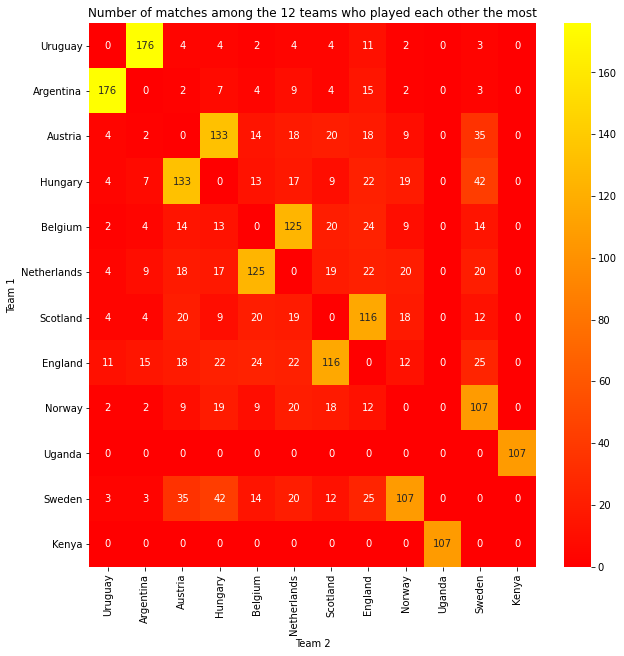

In [81]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_teams6, cmap = 'autumn', annot = True, fmt ='d', xticklabels = teams_top6_list)
plt.title('Number of matches among the 12 teams who played each other the most')
plt.xlabel('Team 2')
plt.ylabel('Team 1')


The two teams that played each other the most are Argentina and Uruguay.

## Task (Stretch)
Apply your creativity to show some additional insights from the data.